<a href="https://colab.research.google.com/github/Hamza1407/AnalyseTemp/blob/main/Prediction_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


warnings.filterwarnings("ignore")


In [2]:
donnees = np.loadtxt('/content/dryer2.txt')

In [3]:
df=pd.DataFrame(donnees,columns=['TimeStamp','fuel flow rate','hot gas exhaust fan speed','rate of flow of raw material','dry bulb temperature','wet bulb temperature','moisture content of raw material'])

In [4]:
df

,TimeStamp,fuel flow rate,hot gas exhaust fan speed,rate of flow of raw material,dry bulb temperature,wet bulb temperature,moisture content of raw material
0,1.0,-5.941496,18.486037,214.909990,-3.784765,-2.536373,-0.059663
1,2.0,-5.941496,18.486037,14.603966,-3.808218,-2.612767,0.099624
2,3.0,-5.941496,18.486037,-145.165050,-3.896871,-2.689039,-0.188356
3,4.0,-5.941496,18.486037,-215.826600,-4.077698,-2.760334,-0.661060
4,5.0,-5.941496,18.486037,-229.491220,-4.285383,-2.827439,-0.784796
...,...,...,...,...,...,...,...
862,863.0,3.058505,-1.513963,229.274700,4.440707,2.219649,-0.962103
863,864.0,3.058505,-1.513963,232.683760,4.260164,2.165661,-0.940534
864,865.0,3.058505,-1.513963,136.497460,4.049565,2.111805,-0.830525
865,866.0,3.058505,-1.513963,-79.666627,3.835279,2.055173,-0.674758


On affiche les données de sortie (3 dernières colonnes) en fonction du timestamp.

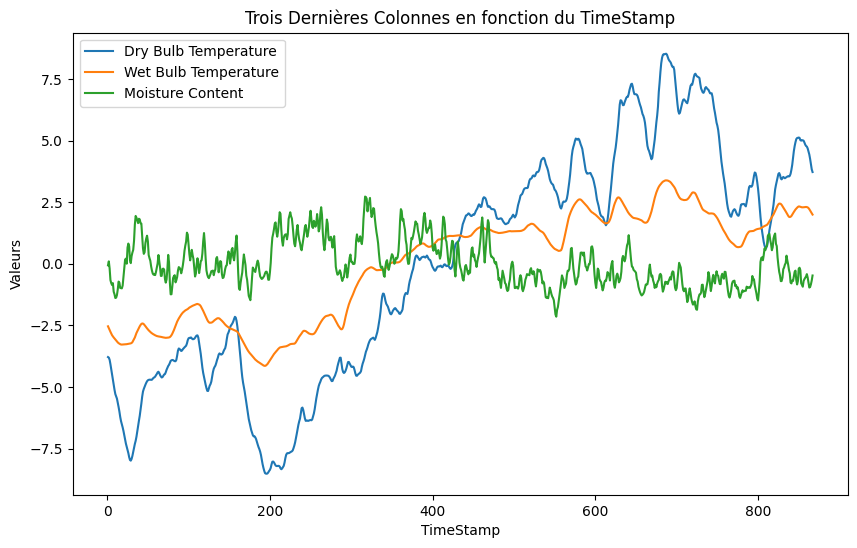

In [5]:

# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(df['TimeStamp'], df['dry bulb temperature'], label='Dry Bulb Temperature')
plt.plot(df['TimeStamp'], df['wet bulb temperature'], label='Wet Bulb Temperature')
plt.plot(df['TimeStamp'], df['moisture content of raw material'], label='Moisture Content')

# Ajoutez des étiquettes et une légende
plt.xlabel('TimeStamp')
plt.ylabel('Valeurs')
plt.title('Trois Dernières Colonnes en fonction du TimeStamp')
plt.legend()

# Affichez le graphe
plt.show()

On découpe les données en train et test et on normalize celles-ci :

In [6]:
split=int(0.8*len(df))
train=df.loc[0:split,]
test=df.loc[split:,]

X_train=train.iloc[:,0:4]
y_train=train.iloc[:,4:]

X_test=test.iloc[:,0:4]
y_test=test.iloc[:,4:]


scaler = StandardScaler()

# Ajuster et appliquer la transformation sur X_train
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la même transformation sur X_test
X_test_scaled = scaler.transform(X_test)

### **Régresseur MLP (Méthode directe)**

On commence par entrainer notre modèle avec un MLP :

In [7]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_scaled, y_train)
predictions=regr.predict(X_test_scaled)

On affiche le MAE pour les 3 données de sortie autant pour les données de test que pour les données d'entrainement.

Afficher le MAE pour les données d'entrainement nous permet d'eviter de tomber dans du overfitting. Il nous permettera aussi de modifier les paramètres.

In [14]:
for i in range(3):

    # Métriques sur les données d'entraînement
    column_i_train_predictions = regr.predict(X_train)[:, i]

    train_mean_absolute_error =mean_absolute_error(y_train.iloc[:, i], column_i_train_predictions)

    print(f"Pour la colonne {y_train.columns[i]} sur les données d'entraînement, le Mean Absolute Error est de : {train_mean_absolute_error}")

    column_i_test_predictions = predictions[:, i]
    column_i_test_data = y_test.iloc[:, i]


    test_mean_absolute_error =mean_absolute_error(column_i_test_data, column_i_test_predictions)


    print(f"Pour la colonne {y_test.columns[i]} sur les données de test, le Mean Absolute Error est de : {test_mean_absolute_error}")


Pour la colonne dry bulb temperature sur les données d'entraînement, le Mean Absolute Error est de : 1271.2228525148787
Pour la colonne dry bulb temperature sur les données de test, le Mean Absolute Error est de : 3.842164495172419
Pour la colonne wet bulb temperature sur les données d'entraînement, le Mean Absolute Error est de : 385.2782580272203
Pour la colonne wet bulb temperature sur les données de test, le Mean Absolute Error est de : 0.9900681322585435
Pour la colonne moisture content of raw material sur les données d'entraînement, le Mean Absolute Error est de : 425.12064779497314
Pour la colonne moisture content of raw material sur les données de test, le Mean Absolute Error est de : 1.0765891612417848


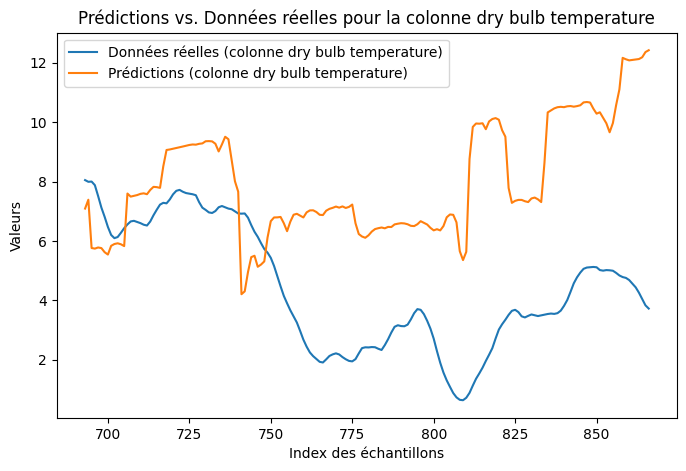

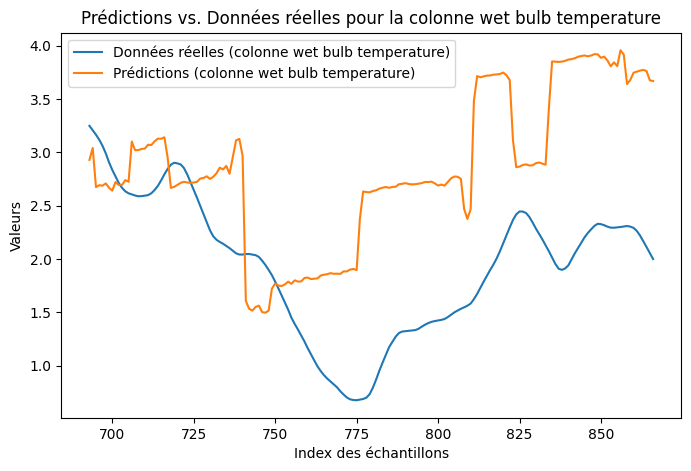

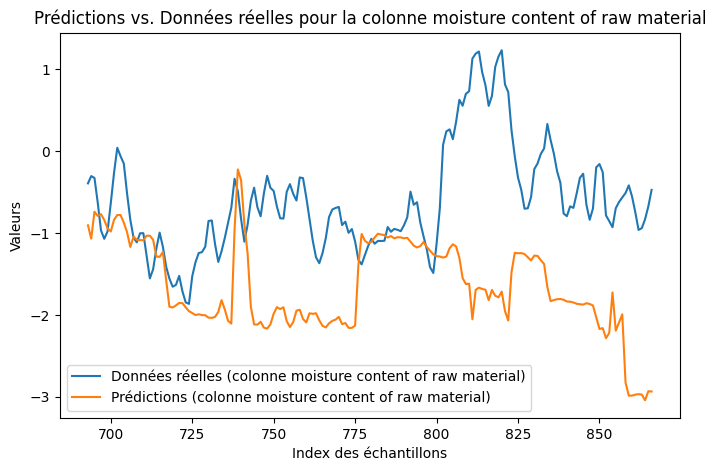

In [18]:
common_index = y_test.index

# Boucle sur les colonnes
for i in range(3):
    column_i_test_predictions = predictions[:, i]
    column_i_test_data = y_test.iloc[:, i]

    # Afficher les prédictions et les données réelles dans une courbe avec l'index commun
    plt.figure(figsize=(8, 5))
    plt.plot(common_index, column_i_test_data, label=f"Données réelles (colonne {y_test.columns[i]})")
    plt.plot(common_index, column_i_test_predictions, label=f"Prédictions (colonne {y_test.columns[i]})")
    plt.title(f"Prédictions vs. Données réelles pour la colonne {y_test.columns[i]}")
    plt.xlabel("Index des échantillons")
    plt.ylabel("Valeurs")
    plt.legend()
    plt.show()

Essayon avec un autre regresseur MLP, mais cette fois en utilisant différentes taille pour les couches cachées :

In [12]:
regr_2 = MLPRegressor(hidden_layer_sizes=(260, 130), activation='relu', random_state=1, max_iter=500).fit(X_train_scaled, y_train)
predictions_2=regr_2.predict(X_test_scaled)

In [15]:
for i in range(3):
    column_i_predictions = predictions_2[:, i]
    column_i_test_data = y_test.iloc[:, i]

    # Calcul de la différence entre les prédictions et les données de test pour la colonne i
    difference = column_i_predictions - column_i_test_data

    # Calcul de la métrique de votre choix (par exemple, la moyenne des erreurs absolues)
    mean_absolute_error = np.mean(np.abs(difference))

    print(f" Pour la colonne {y_test.columns[i]} le Mean Absolute Error est de : {mean_absolute_error}")

 Pour la colonne dry bulb temperature le Mean Absolute Error est de : 3.6305948512818436
 Pour la colonne wet bulb temperature le Mean Absolute Error est de : 0.7971230932308608
 Pour la colonne moisture content of raw material le Mean Absolute Error est de : 0.9272499836836683


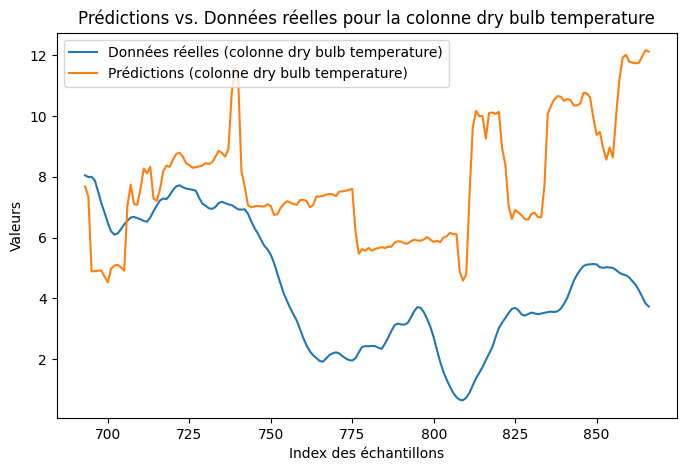

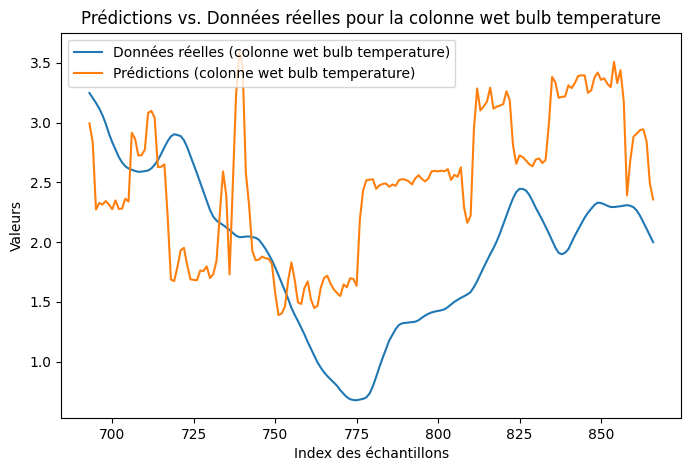

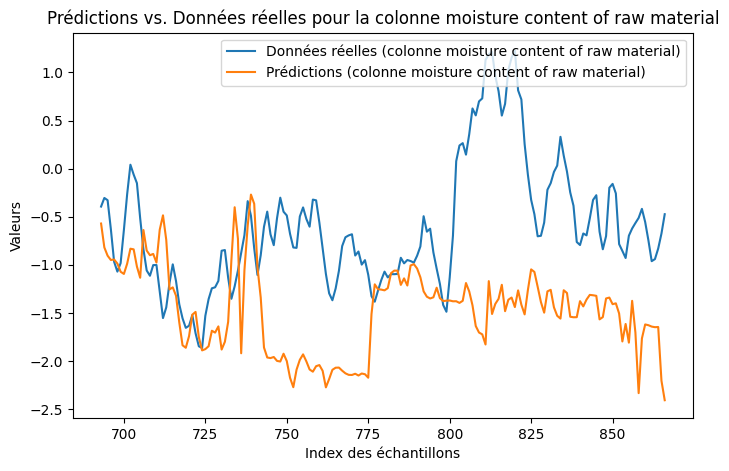

In [16]:
common_index = y_test.index

# Boucle sur les colonnes
for i in range(3):
    column_i_test_predictions = predictions_2[:, i]
    column_i_test_data = y_test.iloc[:, i]

    # Afficher les prédictions et les données réelles dans une courbe avec l'index commun
    plt.figure(figsize=(8, 5))
    plt.plot(common_index, column_i_test_data, label=f"Données réelles (colonne {y_test.columns[i]})")
    plt.plot(common_index, column_i_test_predictions, label=f"Prédictions (colonne {y_test.columns[i]})")
    plt.title(f"Prédictions vs. Données réelles pour la colonne {y_test.columns[i]}")
    plt.xlabel("Index des échantillons")
    plt.ylabel("Valeurs")
    plt.legend()
    plt.show()

Les MAE scores se sont légerement améliorés pour les données de test.

Mais on peut faire mieux en changeant cette fois la fonction d'activation à la sortie des couches.

In [19]:
regr_3 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', random_state=1, max_iter=500).fit(X_train_scaled, y_train)
predictions_3=regr_3.predict(X_test_scaled)

In [20]:
for i in range(3):

    # Métriques sur les données d'entraînement
    column_i_train_predictions = regr_3.predict(X_train)[:, i]

    train_difference = column_i_train_predictions - y_train.iloc[:, i]

    train_mean_absolute_error = np.mean(np.abs(train_difference))

    print(f"Pour la colonne {y_train.columns[i]} sur les données d'entraînement, le Mean Absolute Error est de : {train_mean_absolute_error}")

    column_i_test_predictions = predictions_3[:, i]
    column_i_test_data = y_test.iloc[:, i]

    test_difference = column_i_test_predictions - column_i_test_data

    test_mean_absolute_error = np.mean(np.abs(test_difference))

    print(f"Pour la colonne {y_test.columns[i]} sur les données de test, le Mean Absolute Error est de : {test_mean_absolute_error}")


Pour la colonne dry bulb temperature sur les données d'entraînement, le Mean Absolute Error est de : 7.8422556416275695
Pour la colonne dry bulb temperature sur les données de test, le Mean Absolute Error est de : 2.3274762071809247
Pour la colonne wet bulb temperature sur les données d'entraînement, le Mean Absolute Error est de : 2.8240962451907587
Pour la colonne wet bulb temperature sur les données de test, le Mean Absolute Error est de : 0.6371147014775667
Pour la colonne moisture content of raw material sur les données d'entraînement, le Mean Absolute Error est de : 1.3193522332348557
Pour la colonne moisture content of raw material sur les données de test, le Mean Absolute Error est de : 0.5153028734631485


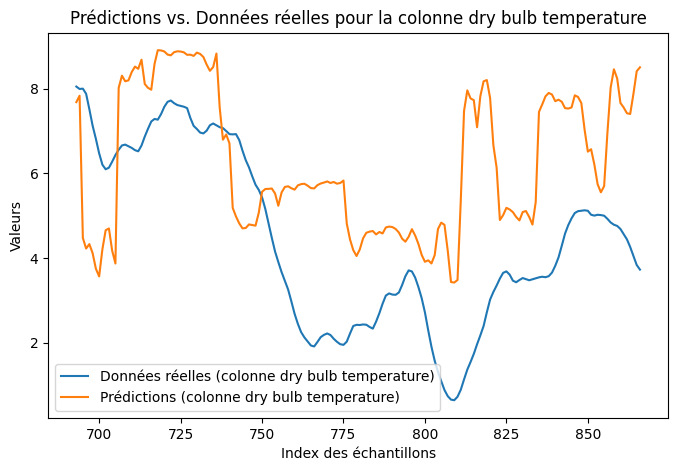

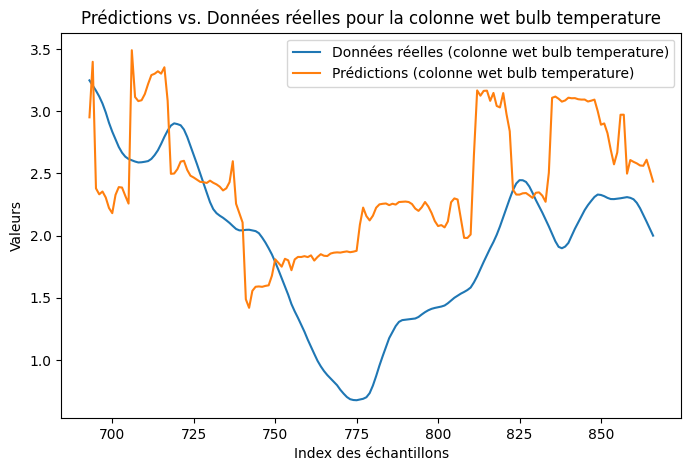

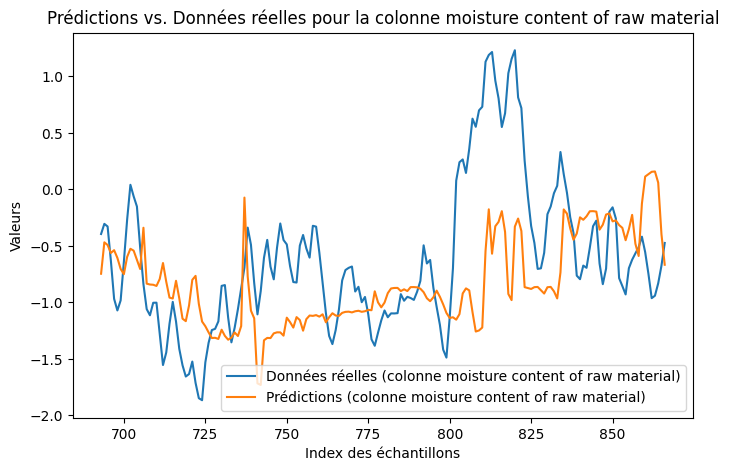

In [21]:
common_index = y_test.index

# Boucle sur les colonnes
for i in range(3):
    column_i_test_predictions = predictions_3[:, i]
    column_i_test_data = y_test.iloc[:, i]

    # Afficher les prédictions et les données réelles dans une courbe avec l'index commun
    plt.figure(figsize=(8, 5))
    plt.plot(common_index, column_i_test_data, label=f"Données réelles (colonne {y_test.columns[i]})")
    plt.plot(common_index, column_i_test_predictions, label=f"Prédictions (colonne {y_test.columns[i]})")
    plt.title(f"Prédictions vs. Données réelles pour la colonne {y_test.columns[i]}")
    plt.xlabel("Index des échantillons")
    plt.ylabel("Valeurs")
    plt.legend()
    plt.show()

On ne va pas s'amuser à changer les paramètres à la main, à la place on va utiliser un GridSearch qui permet de passer en revue plusieurs valeurs des paramètres d'entrée et nous renvoi la meilleur combinaison.

On effectuera un GridSearch sur les 3 paramètres :
- Hidden_layer_sizes
- Activation
- Learning_rate_init

In [ ]:
regr= MLPRegressor(random_state=1, max_iter=500)
param_grid = {
    'hidden_layer_sizes': [(50, 30), (100, 50), (150, 100)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}


grid_search = GridSearchCV(estimator=regr, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train_scaled, y_train)


Les paramètres les plus performamnts sont données par :

In [ ]:
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

In [ ]:
best_regr = MLPRegressor(hidden_layer_sizes=(50, 30), activation='tanh',learning_rate_init=0.001, random_state=1, max_iter=500).fit(X_train_scaled, y_train)
predictions_4=best_regr.predict(X_test_scaled)

On calcul le MAE pour les données de sortie.

In [ ]:
for i in range(3):

    # Métriques sur les données d'entraînement
    column_i_train_predictions = best_regr.predict(X_train)[:, i]

    train_difference = column_i_train_predictions - y_train.iloc[:, i]

    train_mean_absolute_error = np.mean(np.abs(train_difference))

    print(f"Pour la colonne {y_train.columns[i]} sur les données d'entraînement, le Mean Absolute Error est de : {train_mean_absolute_error}")

    column_i_test_predictions = predictions_4[:, i]
    column_i_test_data = y_test.iloc[:, i]

    test_difference = column_i_test_predictions - column_i_test_data

    test_mean_absolute_error = np.mean(np.abs(test_difference))

    print(f"Pour la colonne {y_test.columns[i]} sur les données de test, le Mean Absolute Error est de : {test_mean_absolute_error}")


In [ ]:
common_index = y_test.index

# Boucle sur les colonnes
for i in range(3):
    column_i_test_predictions = predictions_4[:, i]
    column_i_test_data = y_test.iloc[:, i]

    # Afficher les prédictions et les données réelles dans une courbe avec l'index commun
    plt.figure(figsize=(8, 5))
    plt.plot(common_index, column_i_test_data, label=f"Données réelles (colonne {y_test.columns[i]})")
    plt.plot(common_index, column_i_test_predictions, label=f"Prédictions (colonne {y_test.columns[i]})")
    plt.title(f"Prédictions vs. Données réelles pour la colonne {y_test.columns[i]}")
    plt.xlabel("Index des échantillons")
    plt.ylabel("Valeurs")
    plt.legend()
    plt.show()

On a donc réussi à passer de :

- 3.84 à 1.62 pour le dry bulb temperature
- 0.99 à 0.47 pour le wet bulb temperature
- 1.07 à 0.50 pour le moisture content of raw material

### **LSTM (Méthode itérative)**

In [ ]:
sequence_length = 3

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

In [ ]:
df.columns

In [ ]:
Entrees= ['TimeStamp', 'fuel flow rate', 'hot gas exhaust fan speed','rate of flow of raw material']
Sorties= ['dry bulb temperature','wet bulb temperature', 'moisture content of raw material']
X = create_sequences(df[Entrees].values, sequence_length)
y = df[Sorties].values[sequence_length:]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
predictions_5 = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

In [ ]:
for i in range(3):  # 3 colonnes à prédire
    mae_i = mean_absolute_error(y_test[:, i], predictions_5[:, i])
    print(f"Le MAE pour la colonne {Sorties[i]}: {mae_i}")

In [ ]:
for i in range(3):
    column_i_test_predictions = predictions_5[:, i]
    column_i_test_data = y_test[:, i]

    # Afficher les prédictions et les données réelles dans une courbe avec l'index commun
    plt.figure(figsize=(8, 5))
    plt.plot(np.arange(len(y_test)), column_i_test_data, label=f"Données réelles (colonne {i})")
    plt.plot(np.arange(len(y_test)), column_i_test_predictions, label=f"Prédictions (colonne {i})")
    plt.title(f"Prédictions vs. Données réelles pour la colonne {Sorties[i]}")
    plt.xlabel("Index des échantillons")
    plt.ylabel("Valeurs")
    plt.legend()
    plt.show()

Le score est nettement mieux pour 2 colonnes sur 3 ! Et sans avoir à modifier aucun des paramètres.